In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_blobs
%matplotlib inline

In [5]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2,
                  random_state=23)

In [6]:
X.shape

(1000, 2)

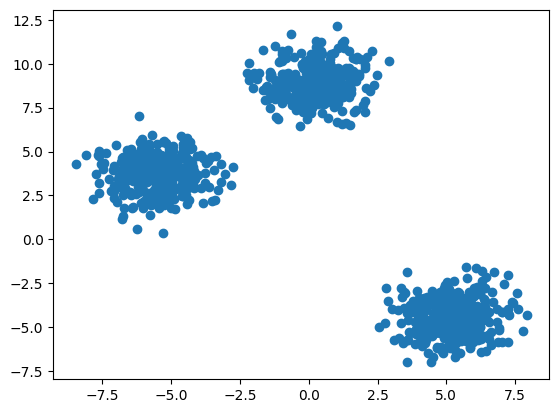

In [7]:
plt.scatter(X[:,0],X[:,1])

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [10]:
from sklearn.cluster import KMeans

**ELbow Method**

In [14]:
# Normal Process
wccs=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X_train)
    wccs.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [15]:
wccs

[34827.57682552021,
 7935.437286145418,
 1319.2730531585612,
 1140.4677884655125,
 992.0708509383511,
 853.3219435918768,
 763.7811094958128,
 664.002124064428,
 578.0787975900967,
 534.8928722270009]

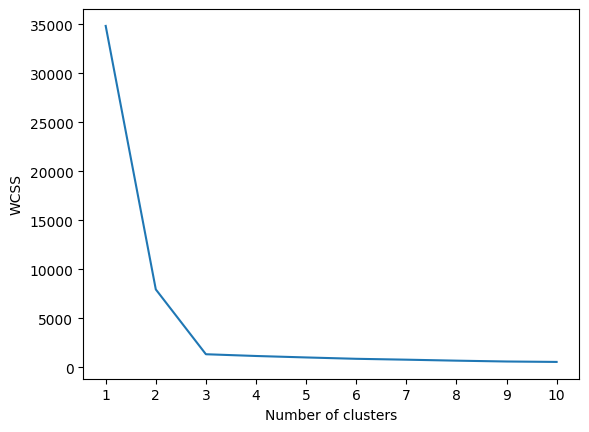

In [16]:
plt.plot(range(1,11),wccs)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [17]:
kmean=KMeans(n_clusters=3)
y_label=kmean.fit_predict(X_train)
y_label

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 0, 1, 0, 2, 0, 0, 2, 0,
       0, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 0, 0, 0, 2, 2, 1, 1, 2, 1, 1,
       2, 0, 0, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 2, 1, 1, 2, 1, 0, 0,
       0, 0, 2, 1, 0, 2, 1, 0, 1, 0, 2, 2, 2, 2, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 0, 1, 2, 2, 0, 1, 0, 1,
       2, 0, 1, 2, 2, 2, 2, 0, 1, 0, 1, 1, 0, 2, 1, 2, 1, 0, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 1, 2, 0, 0, 2, 1, 0, 0, 0, 2, 0, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 0, 0, 2, 2, 2, 1, 2, 2, 1, 0, 2, 2, 0, 2,
       0, 1, 0, 2, 0, 2, 1, 2, 2, 2, 0, 1, 0, 2, 1, 0, 2, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 2, 0, 1, 2, 0,
       2, 1, 1, 2, 2, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 1, 1, 1, 1, 0, 1,
       1, 2, 1, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2, 1, 0, 0, 2, 2, 2, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 2, 0, 2, 0,
       0, 2, 2, 1, 1, 1, 2, 0, 2, 0, 1, 1, 1, 1, 2,

In [20]:
y_test_label=kmean.fit(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


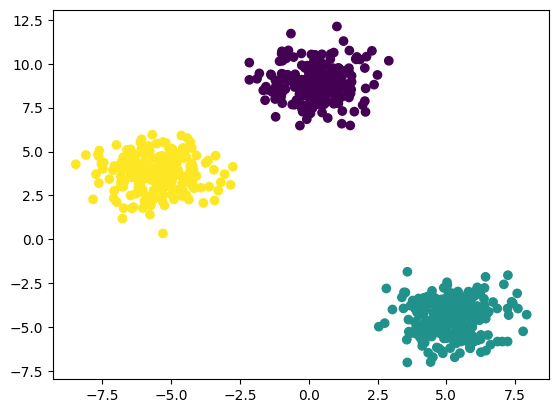

In [18]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_label)

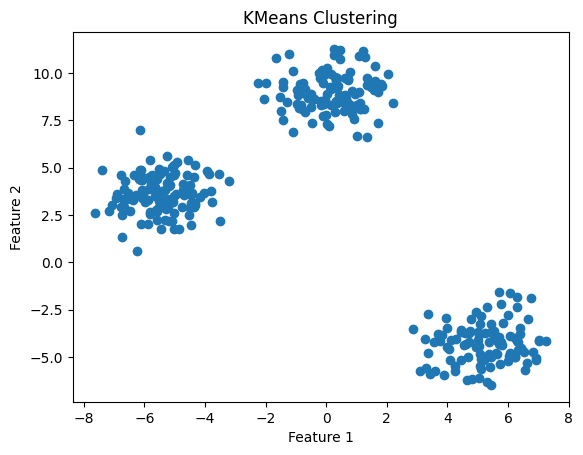

In [24]:
plt.scatter(X_test[:, 0], X_test[:, 1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering')
plt.show()

**Automatic Elbow Method**

In [25]:
!pip install kneed

In [26]:
from kneed import KneeLocator

In [28]:
kneed=KneeLocator(range(1,11) , wccs, curve='convex',direction='decreasing')
kneed.elbow

3

**Performance Metrices**

In [29]:
from sklearn.metrics import silhouette_score

In [30]:
silhoute=[]
for i in range(2,11):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhoute.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [31]:
silhoute

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.4814001336222496,
 0.33886792524096065,
 0.33588202545954454,
 0.336612770067182,
 0.34601327420522054,
 0.34256414842349187]

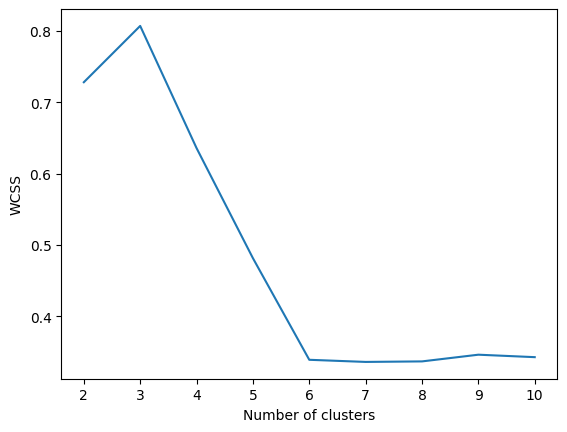

In [34]:
plt.plot(range(2,11),silhoute)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()